In [109]:
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://data.melbourne.vic.gov.au/resource/277b-wacc.csv')
# look at the DataFrame
data.head()

,boardid,boardtype,elevation,humidity_avg,humidity_max,humidity_min,latitude,light_avg,light_max,light_min,...,position,position_address,position_city,position_state,position_zip,rowid,temp_avg,temp_max,temp_min,timestamp
0,508,1,30.10,41.2,41.2,41.2,-37.813408,96.4,96.4,96.4,...,NaN,NaN,NaN,NaN,NaN,508-20141215014000,21.6,21.6,21.6,2014-12-15T01:40:00.000
1,505,1,29.91,48.3,48.3,48.3,-37.813073,93.5,93.5,93.5,...,NaN,NaN,NaN,NaN,NaN,505-20141215014000,23.2,23.2,23.2,2014-12-15T01:40:00.000
2,507,1,38.79,44.8,44.8,44.8,-37.814922,97.2,97.2,97.2,...,NaN,NaN,NaN,NaN,NaN,507-20141215014500,21.6,21.6,21.6,2014-12-15T01:45:00.000
3,502,1,22.57,45.3,45.3,45.3,-37.814610,97.4,97.4,97.4,...,NaN,NaN,NaN,NaN,NaN,502-20141215014500,21.3,21.3,21.3,2014-12-15T01:45:00.000
4,501,1,29.96,43.1,43.1,43.1,-37.814808,97.4,97.4,97.4,...,NaN,NaN,NaN,NaN,NaN,501-20141215014500,22.9,22.9,22.9,2014-12-15T01:45:00.000


In [2]:
# some columns are totaly useless
data.drop([col for col in ['mac', 'boardtype', 'position', 'model', 'rowid'] if col in data], 
        axis=1, inplace=True)
data.head()

,boardid,elevation,humidity_avg,humidity_max,humidity_min,latitude,light_avg,light_max,light_min,location,longitude,position_address,position_city,position_state,position_zip,temp_avg,temp_max,temp_min,timestamp
0,508,30.10,41.2,41.2,41.2,-37.813408,96.4,96.4,96.4,Fitzroy Gardens,144.979492,NaN,NaN,NaN,NaN,21.6,21.6,21.6,2014-12-15T01:40:00.000
1,505,29.91,48.3,48.3,48.3,-37.813073,93.5,93.5,93.5,Fitzroy Gardens,144.980406,NaN,NaN,NaN,NaN,23.2,23.2,23.2,2014-12-15T01:40:00.000
2,507,38.79,44.8,44.8,44.8,-37.814922,97.2,97.2,97.2,Fitzroy Gardens,144.982258,NaN,NaN,NaN,NaN,21.6,21.6,21.6,2014-12-15T01:45:00.000
3,502,22.57,45.3,45.3,45.3,-37.814610,97.4,97.4,97.4,Fitzroy Gardens,144.979018,NaN,NaN,NaN,NaN,21.3,21.3,21.3,2014-12-15T01:45:00.000
4,501,29.96,43.1,43.1,43.1,-37.814808,97.4,97.4,97.4,Fitzroy Gardens,144.980999,NaN,NaN,NaN,NaN,22.9,22.9,22.9,2014-12-15T01:45:00.000


In [5]:
len(data[data.temp_max == data.temp_min])

1000

In [3]:
a = len(data.temp_max)
b = len(data.temp_min)
c = len(data.temp_avg)
if b == a == c:
  print("They have equal length")
else:
  print("they have different length")

They have equal length


In [4]:
#Drop some columns ['humidity_min', 'humidity_max', 'temp_max', 'temp_min', 'light_min','light_max']
data.loc[:, ~data.columns.isin(['humidity_min', 'humidity_max', 'temp_max', 'temp_min', 'light_min','light_max'])]

,boardid,elevation,humidity_avg,latitude,light_avg,location,longitude,position_address,position_city,position_state,position_zip,temp_avg,timestamp
0,508,30.10,41.2,-37.813408,96.4,Fitzroy Gardens,144.979492,NaN,NaN,NaN,NaN,21.6,2014-12-15T01:40:00.000
1,505,29.91,48.3,-37.813073,93.5,Fitzroy Gardens,144.980406,NaN,NaN,NaN,NaN,23.2,2014-12-15T01:40:00.000
2,507,38.79,44.8,-37.814922,97.2,Fitzroy Gardens,144.982258,NaN,NaN,NaN,NaN,21.6,2014-12-15T01:45:00.000
3,502,22.57,45.3,-37.814610,97.4,Fitzroy Gardens,144.979018,NaN,NaN,NaN,NaN,21.3,2014-12-15T01:45:00.000
4,501,29.96,43.1,-37.814808,97.4,Fitzroy Gardens,144.980999,NaN,NaN,NaN,NaN,22.9,2014-12-15T01:45:00.000
5,508,30.10,41.2,-37.813408,96.4,Fitzroy Gardens,144.979492,NaN,NaN,NaN,NaN,21.3,2014-12-15T01:50:00.000
6,505,29.91,47.0,-37.813073,93.5,Fitzroy Gardens,144.980406,NaN,NaN,NaN,NaN,23.2,2014-12-15T01:55:00.000
7,507,38.79,44.5,-37.814922,97.2,Fitzroy Gardens,144.982258,NaN,NaN,NaN,NaN,21.6,2014-12-15T01:55:00.000
8,502,22.57,45.3,-37.814610,97.4,Fitzroy Gardens,144.979018,NaN,NaN,NaN,NaN,21.6,2014-12-15T01:55:00.000
9,501,29.96,43.7,-37.814808,97.4,Fitzroy Gardens,144.980999,NaN,NaN,NaN,NaN,23.5,2014-12-15T02:00:00.000


In [48]:
print(len (data['location']))
print(data['location'].unique())

1000
['Fitzroy Gardens' 'Docklands Library']


In [50]:
print(len(data[data.location == 'Fitzroy Gardens']))

477


In [51]:
print(len(data[data.location == 'Docklands Library']))

523


In [43]:
print(data['boardid'].sort_values().unique())

[501 502 505 506 507 508 509 510 511]


In [7]:
for location in data.location.unique():
    print(location)

Fitzroy Gardens
Docklands Library


In [66]:
print("Borad_IDs for the first location, 'Fitzroy Gardens'  ",data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique())
print("Borad_IDs for the second location, 'Docklands Library'  ", data[data.location == "Docklands Library"].boardid.sort_values().unique())

Borad ids for the first location, 'Fitzroy Gardens'   [501 502 505 507 508]
Borad ids for the first location, 'Docklands Library'   [506 509 510 511]


In [6]:
def count_median(data):
    _data = sorted(data)
    length = len(_data)
    i = int(length/2)
    if length % 2 == 0:
        return (_data[i] + _data[i-1]) / 2
    else:
        return _data[i]


def count_standard_deviation(numbers):
    mean = sum(numbers)/float(len(numbers))

    return sqrt(sum([(i - mean) ** 2 for i in numbers]) / (len(numbers)-1))

In [8]:
boards_Fitzroy = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()

print("\t\t\t\tTemperature Calculation at Fitzroy Gardens\n")
for board in boards_Fitzroy:
    my_median = count_median(data[data.boardid == board].temp_avg)
    my_std = count_standard_deviation(data[data.boardid == board].temp_avg)
    print("Board_number",board ,\
          "\tmy_median","{:.2f}".format(my_median),\
          "\tOrignal_median","{:.2f}".format(data[data.boardid == board].temp_avg.median()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal_stddev","{:.2f}".format(data[data.boardid == board].temp_avg.std()),\
      )

				Temperature Calculation at Fitzroy Gardens

Board_number 501 	my_median 13.20 	Orignal_median 13.20 	my_stddev 5.53 	Orignal_stddev 5.53
Board_number 502 	my_median 13.70 	Orignal_median 13.70 	my_stddev 5.66 	Orignal_stddev 5.66
Board_number 505 	my_median 15.35 	Orignal_median 15.35 	my_stddev 5.45 	Orignal_stddev 5.45
Board_number 507 	my_median 13.35 	Orignal_median 13.35 	my_stddev 5.62 	Orignal_stddev 5.62
Board_number 508 	my_median 15.20 	Orignal_median 15.20 	my_stddev 5.18 	Orignal_stddev 5.18


In [159]:
boards_Fitzroy = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()

print("\t\t\t\tTemperature Calculation at Fitzroy Gardens\n")
for board in boards_Fitzroy:
    my_median = count_median(data[data.boardid == board].light_avg)
    my_std = count_standard_deviation(data[data.boardid == board].light_avg)
    print("Board number",board ,\
         "\tMy_median","{:.2f}".format(my_median),\
          "\tOrignal_median","{:.2f}".format(data[data.boardid == board].light_avg.median()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal_stddev","{:.2f}".format(data[data.boardid == board].light_avg.std()),\
      )

				Temperature Calculation at Fitzroy Gardens

Board number 501 	My_median 11.50 	Orignal_median 11.50 	my_stddev 43.90 	Orignal_stddev 43.90
Board number 502 	My_median 30.65 	Orignal_median 30.65 	my_stddev 42.43 	Orignal_stddev 42.43
Board number 505 	My_median 9.00 	Orignal_median 9.00 	my_stddev 38.83 	Orignal_stddev 38.83
Board number 507 	My_median 18.40 	Orignal_median 18.40 	my_stddev 43.68 	Orignal_stddev 43.68
Board number 508 	My_median 36.10 	Orignal_median 36.10 	my_stddev 41.67 	Orignal_stddev 41.67


In [166]:
boards_Docklands_Library = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()

print("\t\t\t\tHumidity Calculation at Fitzroy Gardens\n")
for board in boards_Docklands_Library:
    my_median = count_median(data[data.boardid == board].humidity_avg)
    my_std = count_standard_deviation(data[data.boardid == board].humidity_avg)
    print("Board_number",board ,\
          "\tMy_median","{:.2f}".format(my_median),\
          "\tOrignal median","{:.2f}".format(data[data.boardid == board].humidity_avg.median()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal stddev","{:.2f}".format(data[data.boardid == board].humidity_avg.std()),\
      )

				Humidity Calculation at Fitzroy Gardens

Board_number 501 	My_median 41.90 	Orignal median 41.90 	my_stddev 10.31 	Orignal stddev 10.31
Board_number 502 	My_median 42.30 	Orignal median 42.30 	my_stddev 11.31 	Orignal stddev 11.31
Board_number 505 	My_median 42.15 	Orignal median 42.15 	my_stddev 10.96 	Orignal stddev 10.96
Board_number 507 	My_median 42.05 	Orignal median 42.05 	my_stddev 11.11 	Orignal stddev 11.11
Board_number 508 	My_median 34.30 	Orignal median 34.30 	my_stddev 9.41 	Orignal stddev 9.41


In [156]:
boards_Docklands_Library = data[data.location == "Docklands Library"].boardid.sort_values().unique()

print("\t\t\t\tTemperature Calculation at Docklands Library\n")
for board in boards_Docklands_Library:
    my_median = count_median(data[data.boardid == board].temp_avg)
    my_std = count_standard_deviation(data[data.boardid == board].temp_avg)
    print("Board_number",board ,\
          "\tOrignal_median","{:.2f}".format(my_median),\
          "\tOrignal_median","{:.2f}".format(data[data.boardid == board].temp_avg.mean()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal_stddev","{:.2f}".format(data[data.boardid == board].temp_avg.std()),\
      )

				Temperature Calculation at Docklands Library

Board_number 506 	Orignal_median 17.40 	Orignal_median 19.43 	my_stddev 5.73 	Orignal_stddev 5.73
Board_number 509 	Orignal_median 17.70 	Orignal_median 18.68 	my_stddev 4.93 	Orignal_stddev 4.93
Board_number 510 	Orignal_median 24.35 	Orignal_median 24.35 	my_stddev 0.21 	Orignal_stddev 0.21
Board_number 511 	Orignal_median 17.70 	Orignal_median 18.84 	my_stddev 5.58 	Orignal_stddev 5.58


In [165]:
boards_Fitzroy = data[data.location == "Docklands Library"].boardid.sort_values().unique()

print("\t\t\t\tLight Calculation at Docklands Library\n")
for board in boards_Fitzroy:
    my_median = count_median(data[data.boardid == board].light_avg)
    my_std = count_standard_deviation(data[data.boardid == board].light_avg)
    print("Board_number",board ,\
          "\tMy_median","{:.2f}".format(my_median),\
          "\tOrignal_median","{:.2f}".format(data[data.boardid == board].light_avg.median()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal_stddev","{:.2f}".format(data[data.boardid == board].light_avg.std()),\
      )

				Light Calculation at Docklands Library

Board_number 506 	My_median 43.60 	Orignal_median 43.60 	my_stddev 42.80 	Orignal_stddev 42.80
Board_number 509 	My_median 81.10 	Orignal_median 81.10 	my_stddev 44.08 	Orignal_stddev 44.08
Board_number 510 	My_median 97.90 	Orignal_median 97.90 	my_stddev 0.42 	Orignal_stddev 0.42
Board_number 511 	My_median 69.80 	Orignal_median 69.80 	my_stddev 40.84 	Orignal_stddev 40.84


In [164]:
boards_Docklands_Library = data[data.location == "Docklands Library"].boardid.sort_values().unique()

print("\t\t\t\tHumidity Calculation at Docklands Library\n")
for board in boards_Docklands_Library:
    my_median = count_median(data[data.boardid == board].humidity_avg)
    my_std = count_standard_deviation(data[data.boardid == board].humidity_avg)
    print("Board_number",board ,\
          "\tMy_median","{:.2f}".format(my_median),\
          "\tOrignal_median","{:.2f}".format(data[data.boardid == board].humidity_avg.median()),\
          "\tmy_stddev","{:.2f}".format(my_std),\
          "\tOrignal_stddev","{:.2f}".format(data[data.boardid == board].humidity_avg.std()),\
      )

				Humidity Calculation at Docklands Library

Board_number 506 	My_median 48.90 	Orignal_median 48.90 	my_stddev 16.35 	Orignal_stddev 16.35
Board_number 509 	My_median 51.90 	Orignal_median 51.90 	my_stddev 15.34 	Orignal_stddev 15.34
Board_number 510 	My_median 43.00 	Orignal_median 43.00 	my_stddev 0.57 	Orignal_stddev 0.57
Board_number 511 	My_median 45.90 	Orignal_median 45.90 	my_stddev 14.72 	Orignal_stddev 14.72


In [13]:
s = pd.to_datetime(data.timestamp)
print(s)

0     2014-12-15 01:40:00
1     2014-12-15 01:40:00
2     2014-12-15 01:45:00
3     2014-12-15 01:45:00
4     2014-12-15 01:45:00
5     2014-12-15 01:50:00
6     2014-12-15 01:55:00
7     2014-12-15 01:55:00
8     2014-12-15 01:55:00
9     2014-12-15 02:00:00
10    2014-12-15 02:00:00
11    2014-12-15 03:55:00
12    2014-12-15 03:55:00
13    2014-12-15 04:00:00
14    2014-12-15 04:00:00
15    2014-12-15 04:05:00
16    2014-12-15 04:05:00
17    2014-12-15 04:10:00
18    2014-12-15 04:10:00
19    2014-12-15 04:20:00
20    2014-12-15 04:30:00
21    2014-12-15 04:55:00
22    2014-12-15 05:20:00
23    2014-12-15 05:40:00
24    2014-12-15 05:45:00
25    2014-12-15 05:50:00
26    2014-12-15 05:55:00
27    2014-12-15 06:05:00
28    2014-12-15 06:05:00
29    2014-12-15 06:10:00
              ...        
970   2014-12-16 20:25:00
971   2014-12-16 20:25:00
972   2014-12-16 20:25:00
973   2014-12-16 20:25:00
974   2014-12-16 20:25:00
975   2014-12-16 20:30:00
976   2014-12-16 20:30:00
977   2014-1

In [115]:
%time data['ts'] = pd.to_datetime(data.timestamp)
data.ts.describe()

CPU times: user 2.11 ms, sys: 399 µs, total: 2.51 ms
Wall time: 2.38 ms


count                    1000
unique                    428
top       2014-12-16 16:50:00
freq                        6
first     2014-12-15 01:40:00
last      2014-12-16 21:05:00
Name: ts, dtype: object

In [125]:
import string
import numpy as np
import random
mystring = "bgryw"
def random_string(length):
    return "".join(random.choice(mystring) for m in range(length))

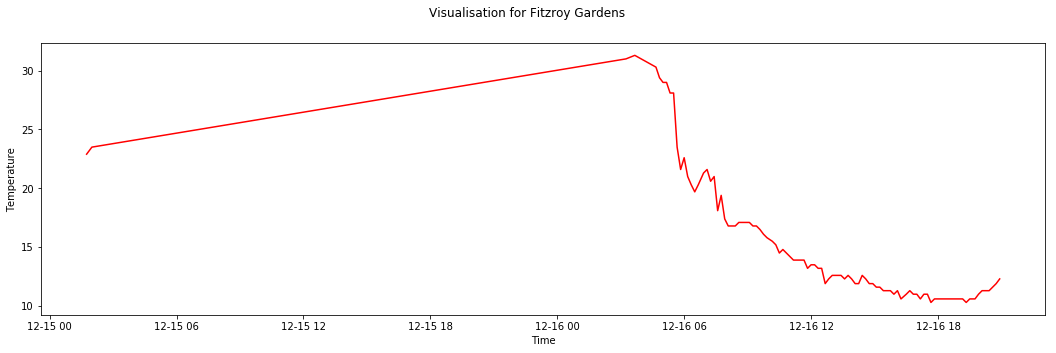

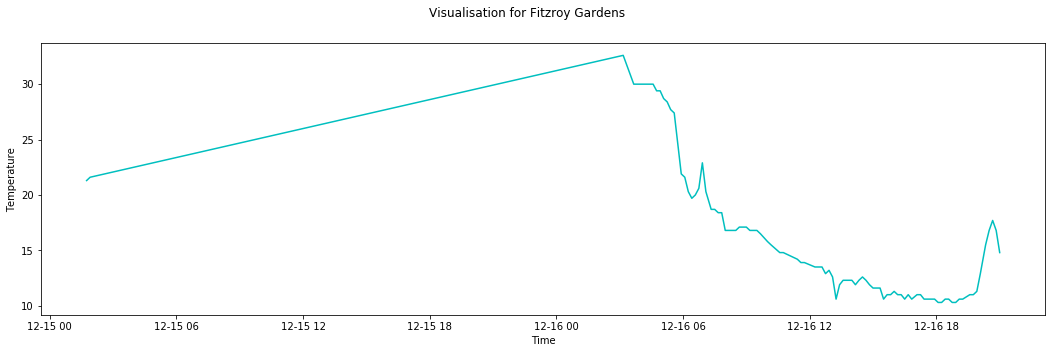

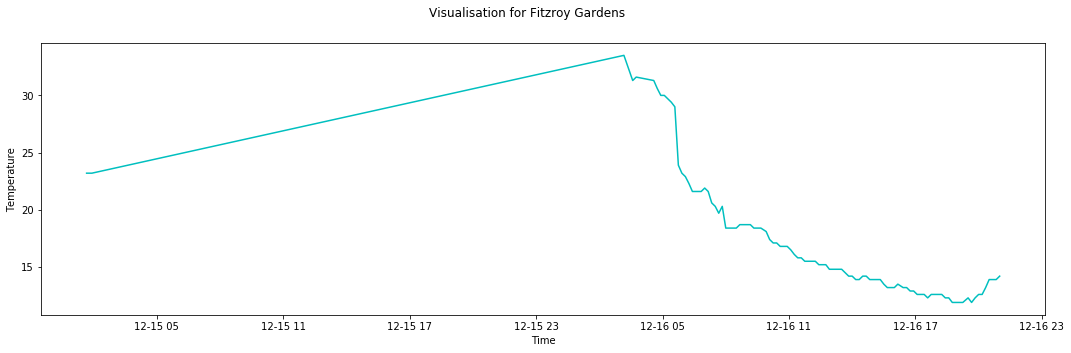

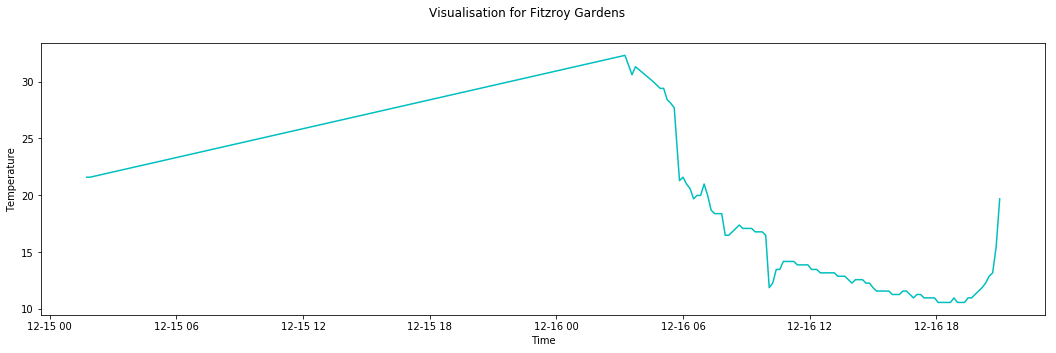

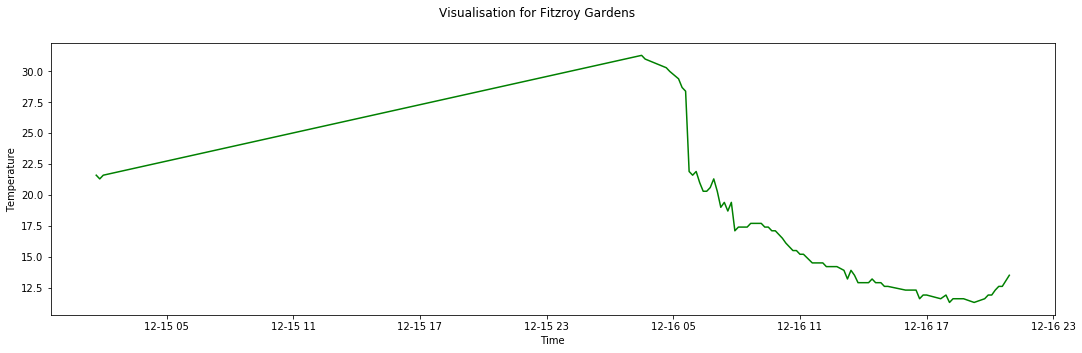

In [158]:
loc_filter = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()
color = random_string(1)
for loc in loc_filter:
    plt.figure(figsize=(18,5))
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    x = data[data.boardid == loc].ts
    y = data[data.boardid == loc].temp_avg
    plt.plot(x, 
             y, c = l)
    plt.ylabel('Temperature')
    plt.xlabel('Time')
    plt.suptitle('Visualisation for Fitzroy Gardens')
    plt.show()

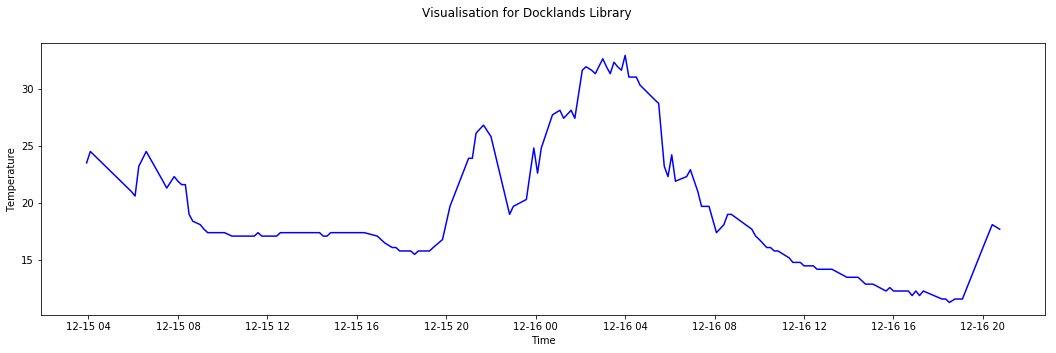

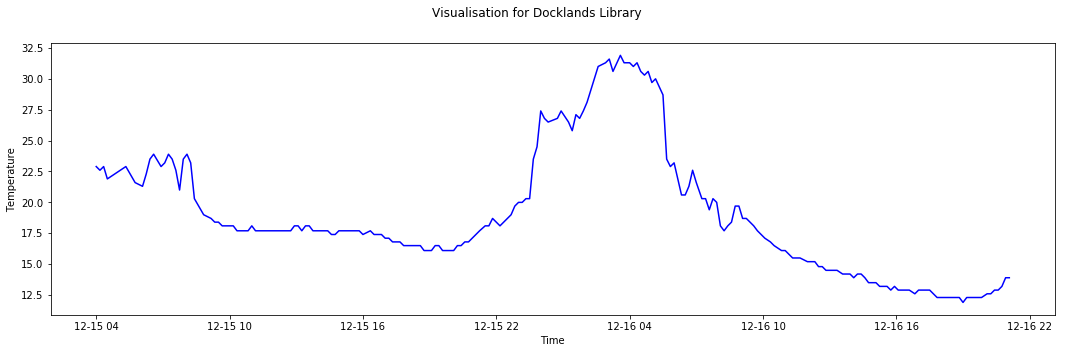

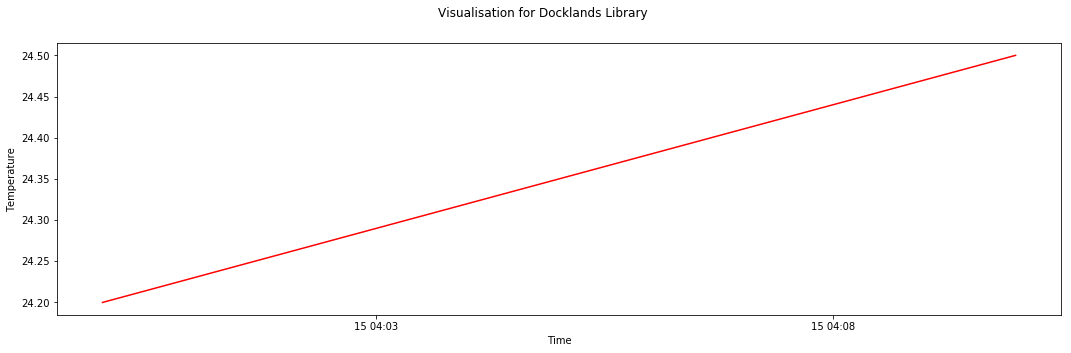

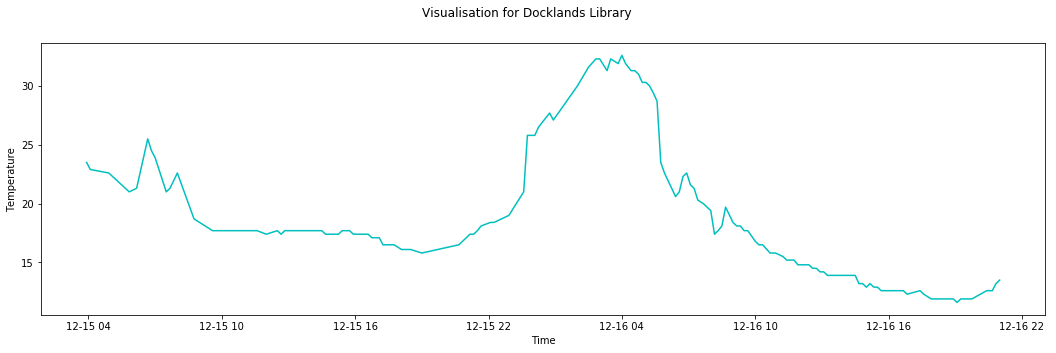

In [159]:
# model
loc_filter = data[data.location == "Docklands Library"].boardid.sort_values().unique()

for loc in loc_filter:
    
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    plt.figure(1, figsize=(18,5))
    #plt.figure(figsize=(18,5))
    x = data[data.boardid == loc].ts
    y = data[data.boardid == loc].temp_avg
    plt.plot(x, 
             y, c = l)
    plt.ylabel('Temperature')
    plt.xlabel('Time')
    plt.suptitle('Visualisation for Docklands Library')
    plt.show()
         

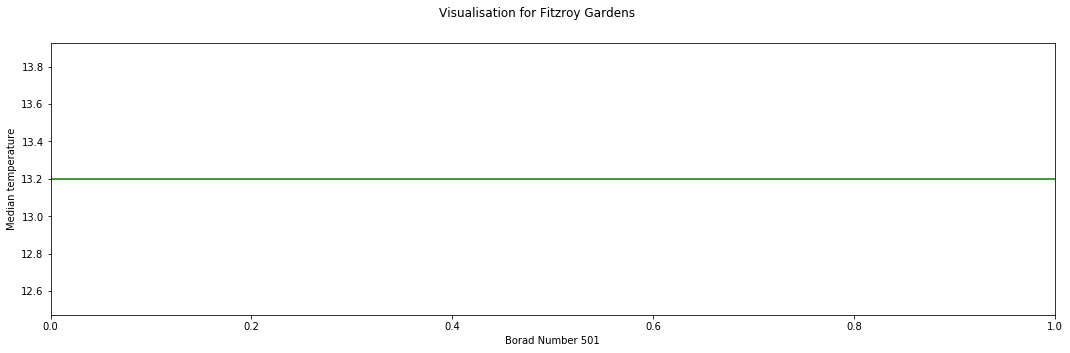

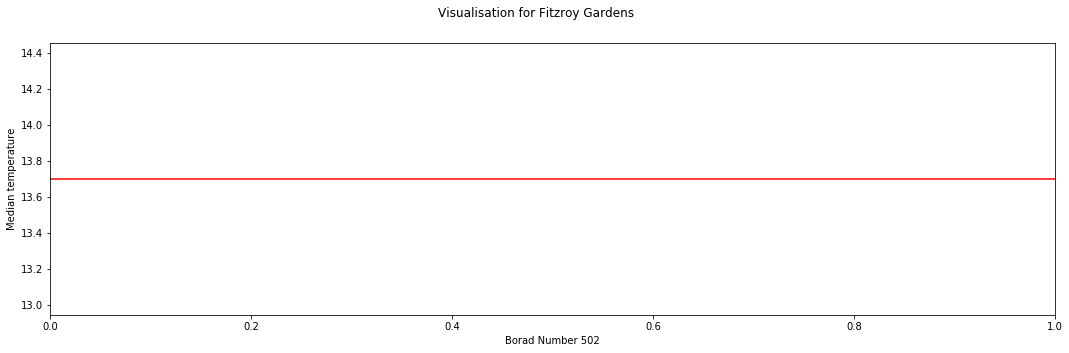

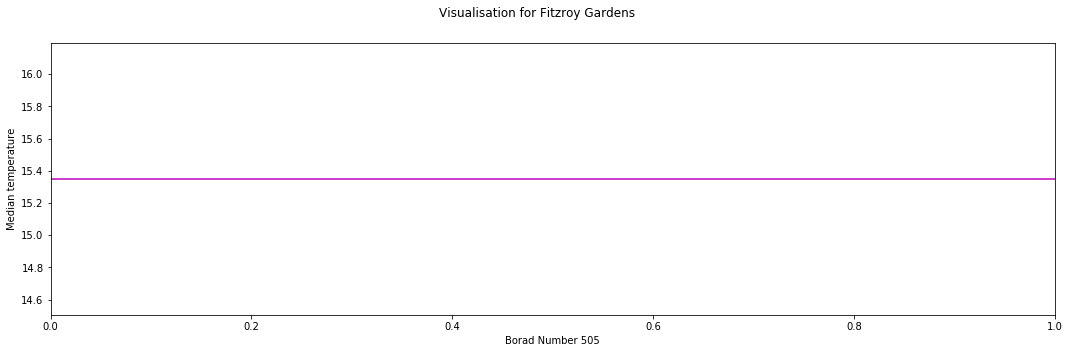

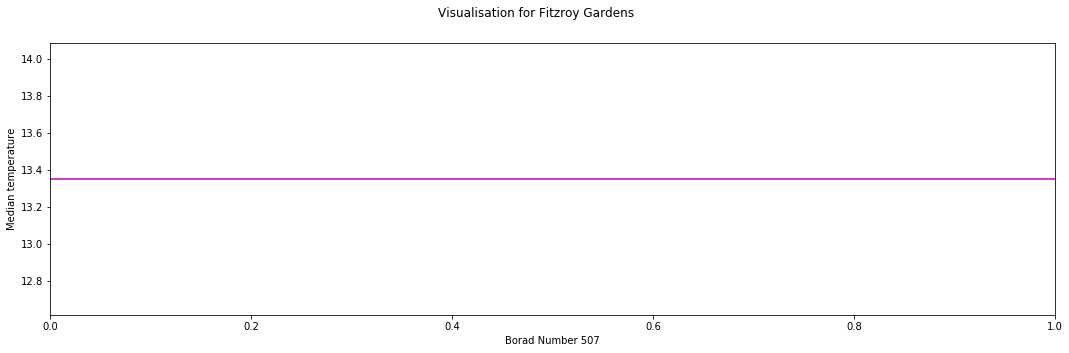

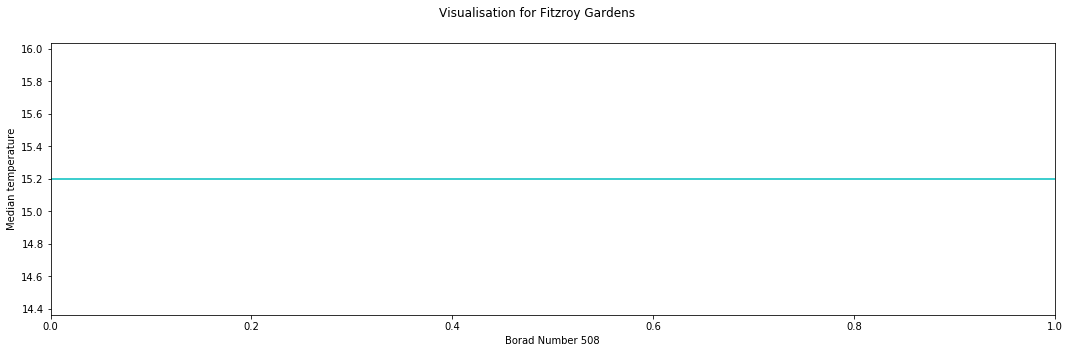

In [192]:
#Plot the median of the boards at Fitzroy Gardens

loc_filter = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()
color = random_string(1)
for loc in loc_filter:
    plt.figure(figsize=(18,5))
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    temp = data[data.boardid == loc].temp_avg
    y = count_median(temp)
    plt.axhline(y, c=l, linestyle='-')
    plt.ylabel('Median temperature')
    plt.xlabel('Borad Number' + ' ' +format(loc))
    plt.suptitle('Visualisation for Fitzroy Gardens')
    plt.show()

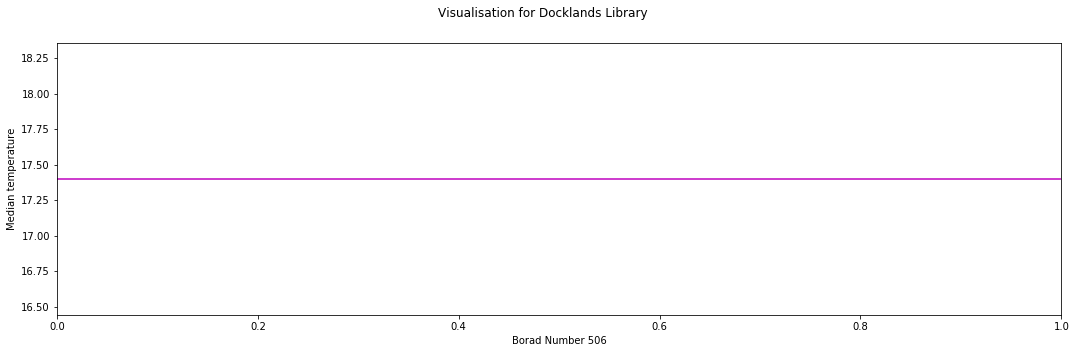

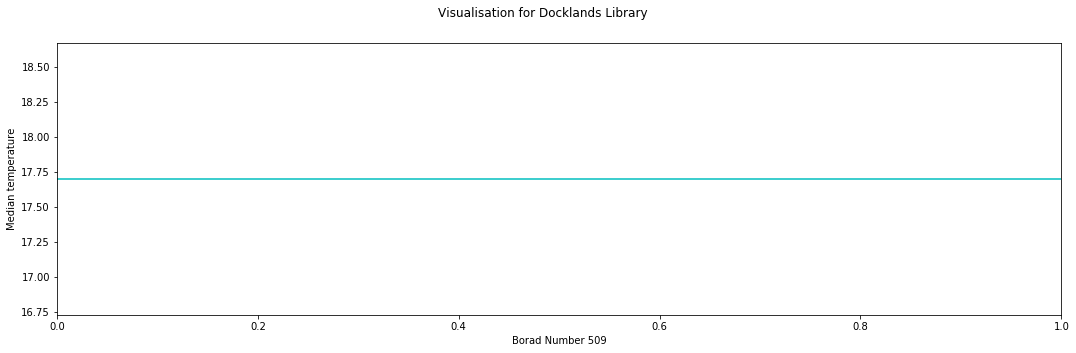

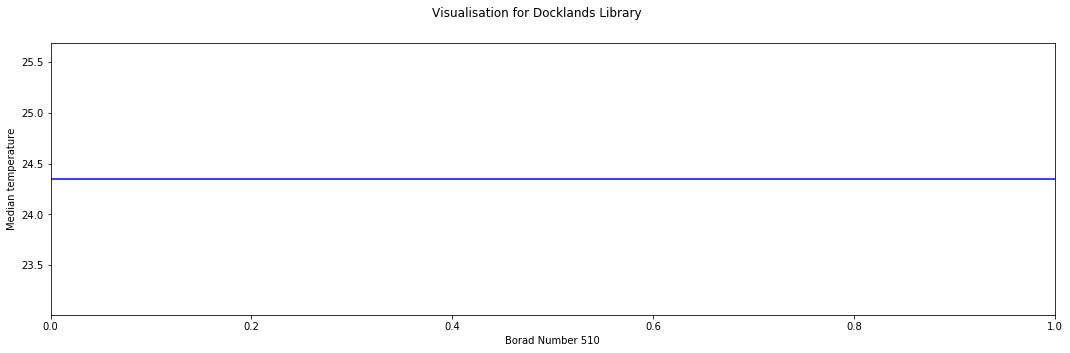

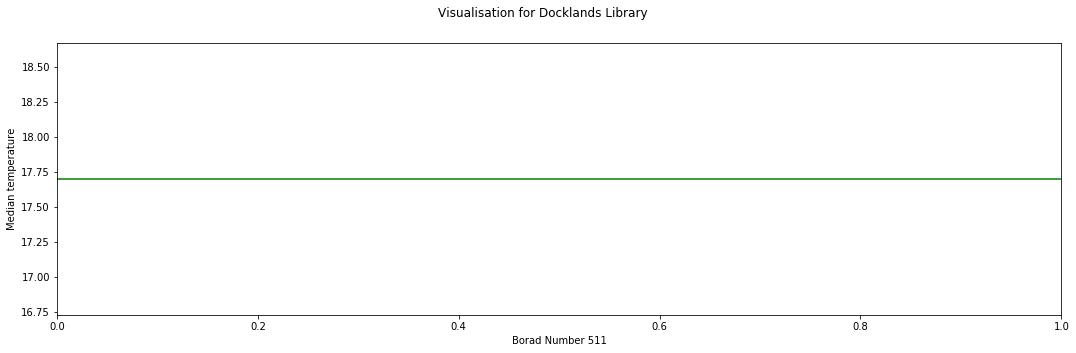

In [193]:
#Plot the median of the boards at Docklands Library

loc_filter = data[data.location == "Docklands Library"].boardid.sort_values().unique()
color = random_string(1)
for loc in loc_filter:
    plt.figure(figsize=(18,5))
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    temp = data[data.boardid == loc].temp_avg
    y = count_median(temp)
    plt.axhline(y, c=l, linestyle='-')
    plt.ylabel('Median temperature')
    plt.xlabel('Borad Number' + ' ' +format(loc))
    plt.suptitle('Visualisation for Docklands Library')
    plt.show()

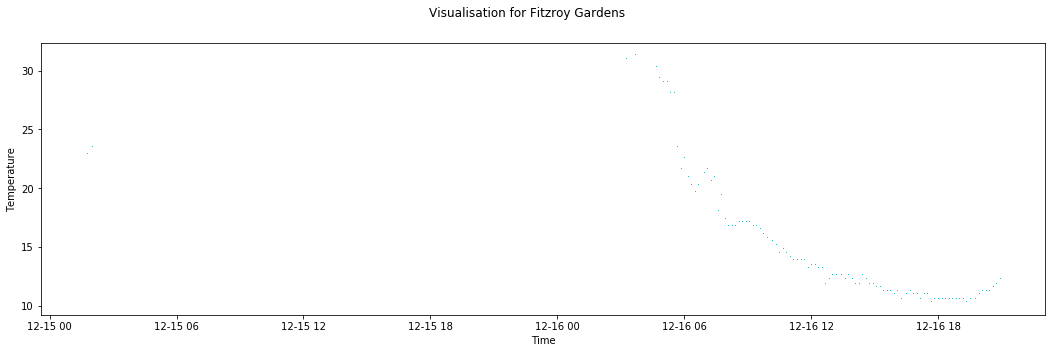

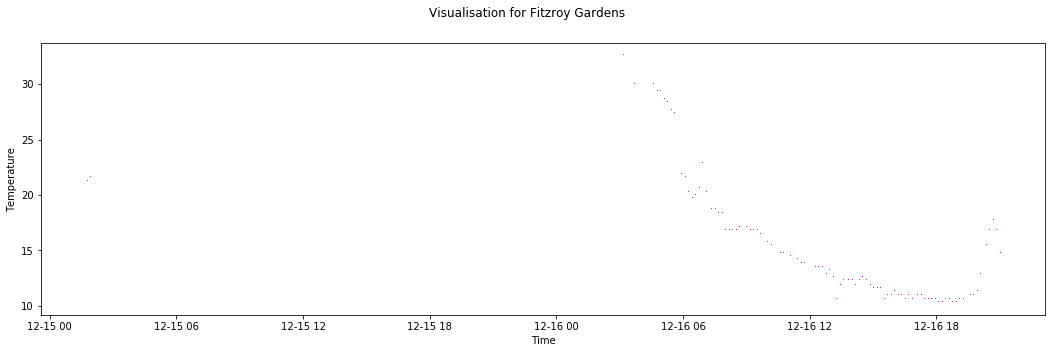

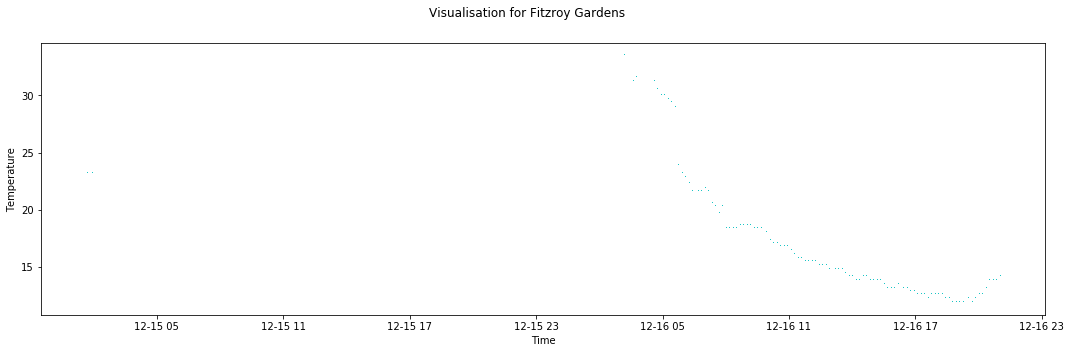

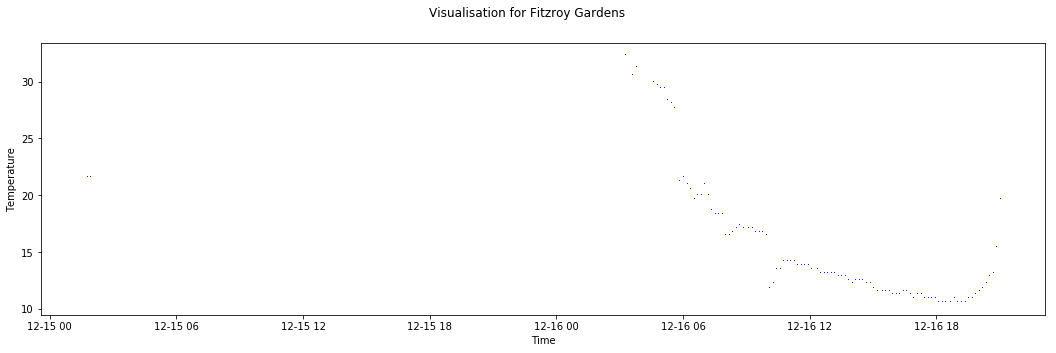

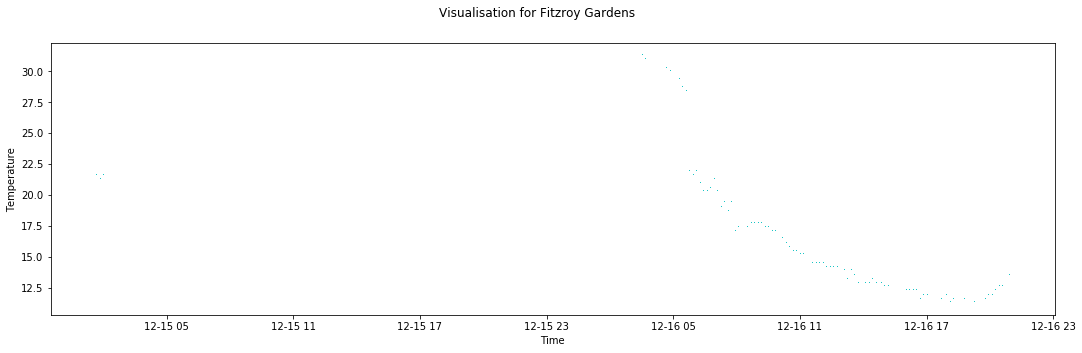

In [195]:
#Attention this a just repetition of plot nr1 above 
loc_filter = data[data.location == "Fitzroy Gardens"].boardid.sort_values().unique()
color = random_string(1)
for loc in loc_filter:
    plt.figure(figsize=(18,5))
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    x = data[data.boardid == loc].ts
    y = data[data.boardid == loc].temp_avg
    plt.plot(x, \
             y, \
             ',', c=l, alpha=.9)
    plt.ylabel('Temperature')
    plt.xlabel('Time')
    plt.suptitle('Visualisation for Fitzroy Gardens')
    plt.show()

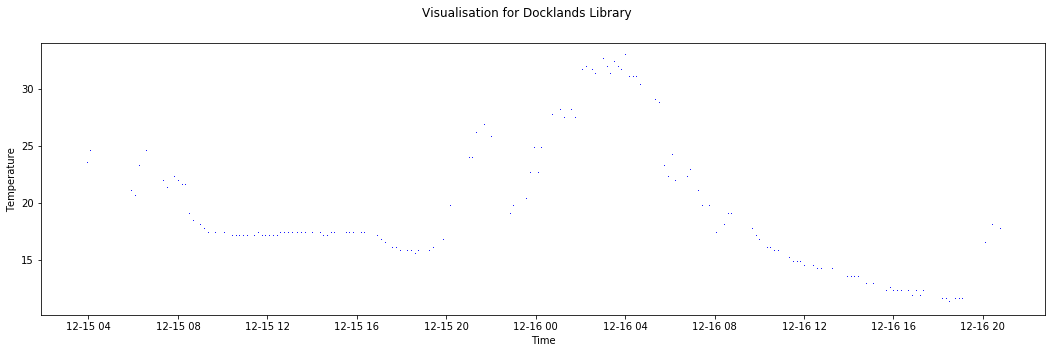

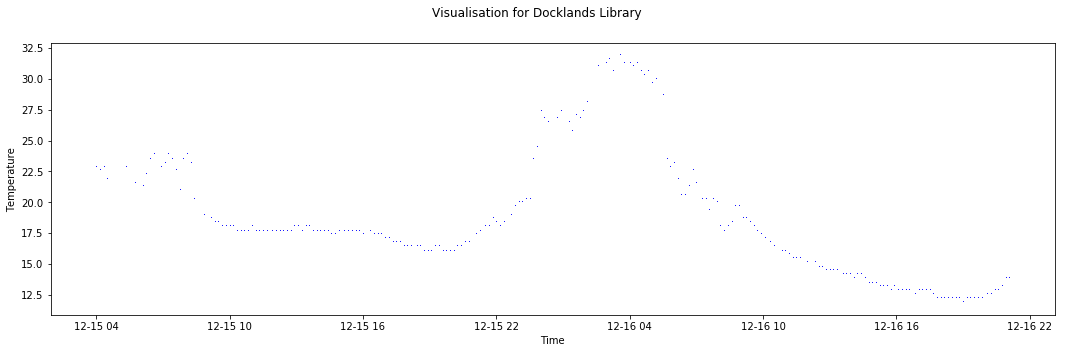

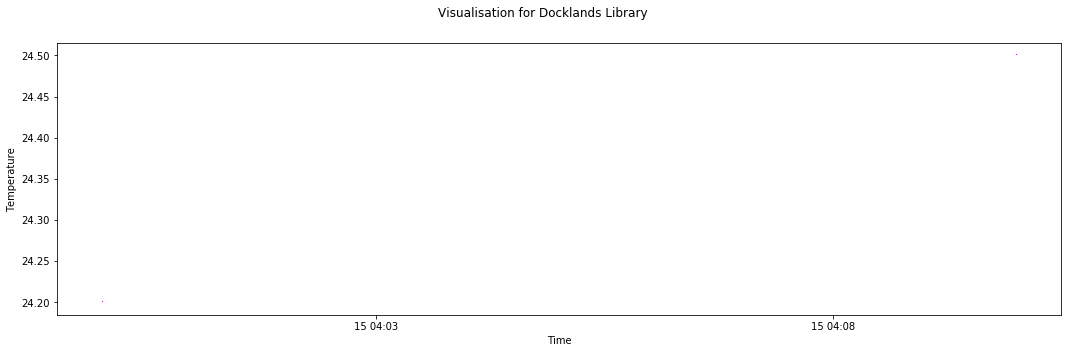

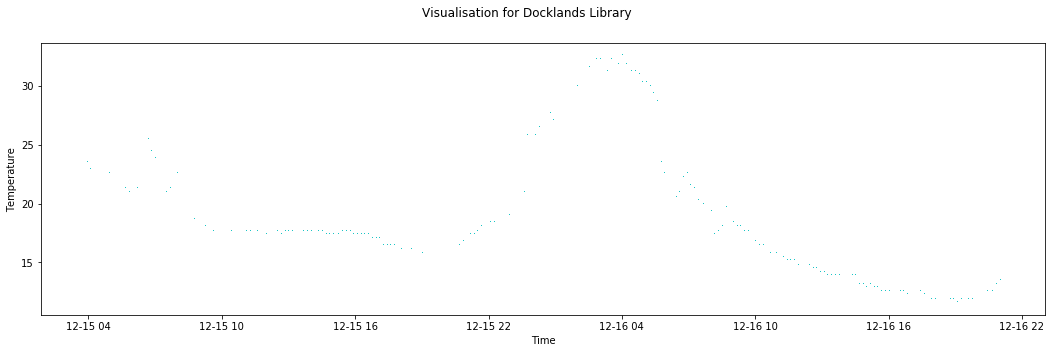

In [161]:
#Attention this a just repetition of plot nr2 above 
loc_filter = data[data.location == "Docklands Library"].boardid.sort_values().unique()
color = random_string(1)
for loc in loc_filter:
    plt.figure(figsize=(18,5))
    my_string = "bgrcmykw"
    i = random.randint(0,4)
    l = my_string[i]
    x = data[data.boardid == loc].ts
    y = data[data.boardid == loc].temp_avg
    plt.plot(x, \
             y, \
             ',', c=l, alpha=.9)
    plt.ylabel('Temperature')
    plt.xlabel('Time')
    plt.suptitle('Visualisation for Docklands Library')
    plt.show()